# **A. Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# **B. Data Loading**

In [2]:
# read dataset .csv
dataset_spotify = pd.read_csv("universal_top_spotify_songs.csv")

dataset_spotify.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0R6NfOiLzLj4O5VbYSJAjf,La Diabla,Xavi,1,1,1,NaN,2024-01-08,95,False,...,11,-4.372,0,0.0409,0.2550,0.000000,0.2360,0.697,131.842,3
1,3rUGC1vUpkDG9CZFHMur1t,greedy,Tate McRae,2,-1,-1,NaN,2024-01-08,99,True,...,6,-3.180,0,0.0319,0.2560,0.000000,0.1140,0.844,111.018,1
2,4xhsWYTOGcal8zt0J161CU,Lovin On Me,Jack Harlow,3,0,1,NaN,2024-01-08,98,True,...,2,-4.911,1,0.0568,0.0026,0.000002,0.0937,0.606,104.983,4
3,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,Taylor Swift,4,0,-1,NaN,2024-01-08,98,False,...,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,4
4,7CyPwkp0oE8Ro9Dd5CUDjW,"One Of The Girls (with JENNIE, Lily Rose Depp)","The Weeknd, JENNIE, Lily-Rose Depp",5,0,2,NaN,2024-01-08,96,False,...,8,-6.287,1,0.0318,0.0545,0.000000,0.1620,0.202,87.510,4


In [ ]:
# data information
dataset_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302442 entries, 0 to 302441
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   spotify_id          302442 non-null  object 
 1   name                302420 non-null  object 
 2   artists             302420 non-null  object 
 3   daily_rank          302442 non-null  int64  
 4   daily_movement      302442 non-null  int64  
 5   weekly_movement     302442 non-null  int64  
 6   country             298336 non-null  object 
 7   snapshot_date       302442 non-null  object 
 8   popularity          302442 non-null  int64  
 9   is_explicit         302442 non-null  bool   
 10  duration_ms         302442 non-null  int64  
 11  album_name          302259 non-null  object 
 12  album_release_date  302259 non-null  object 
 13  danceability        302442 non-null  float64
 14  energy              302442 non-null  float64
 15  key                 302442 non-nul

In [3]:
dataset_spotify.shape

(302442, 25)

In the universal_top_spotify_songs dataset there are 302442 rows of data and 25 columns which have 1 boolean data type, 9 float data types, 8 integer data types and 7 object data types.

# **C. Data Cleaning**

In [3]:
# missing value check
dataset_spotify.isnull().any()

spotify_id            False
name                   True
artists                True
daily_rank            False
daily_movement        False
weekly_movement       False
country                True
snapshot_date         False
popularity            False
is_explicit           False
duration_ms           False
album_name             True
album_release_date     True
danceability          False
energy                False
key                   False
loudness              False
mode                  False
speechiness           False
acousticness          False
instrumentalness      False
liveness              False
valence               False
tempo                 False
time_signature        False
dtype: bool

In this dataset there is null data in the name, artists, country, album_name and album_realease_date columns.

In [4]:
# copy dataframe
df = dataset_spotify.copy()

In [6]:
# handling missing value
df = df.dropna()

In [7]:
df.isnull().any()

spotify_id            False
name                  False
artists               False
daily_rank            False
daily_movement        False
weekly_movement       False
country               False
snapshot_date         False
popularity            False
is_explicit           False
duration_ms           False
album_name            False
album_release_date    False
danceability          False
energy                False
key                   False
loudness              False
mode                  False
speechiness           False
acousticness          False
instrumentalness      False
liveness              False
valence               False
tempo                 False
time_signature        False
dtype: bool

In [8]:
df.shape

(298156, 25)

Null data has been handled and 298156 rows of data remain

In [14]:
# change the data type
df["snapshot_date"] = pd.to_datetime(df["snapshot_date"])
df["album_release_date"] = pd.to_datetime(df["album_release_date"])

The snapshot_date and album_release_date columns have been successfully converted to the datetime data type

# **D. Analysis and Calculations**

### 1. Which artist has the most popular songs?

In [9]:
# Look for the highest popularity value
tingkat_popularitas = df.popularity.max()
tingkat_popularitas

# Displays artist, song title and highest popularity
df[["artists","name","popularity"]].sort_values(by=["popularity"], ascending=False).drop_duplicates(subset=['artists']).head(1) 

,artists,name,popularity
70460,Mariah Carey,All I Want for Christmas Is You,100


The most popular artist on Spotify is Mariah Carey with her song All I Want for Christmas Is You

### 2. Five countries that release the most songs on Spotify?

In [12]:
# Displays countries and the number of titles in each country
df[["country","name"]].groupby("country").agg({'name' : pd.Series.nunique}).sort_values(by=["name"], ascending=False).head()

,name
country,
LV,284
DE,262
CH,258
EE,254
FI,246


Text(0.5, 1.0, '5 countries that release the most songs')

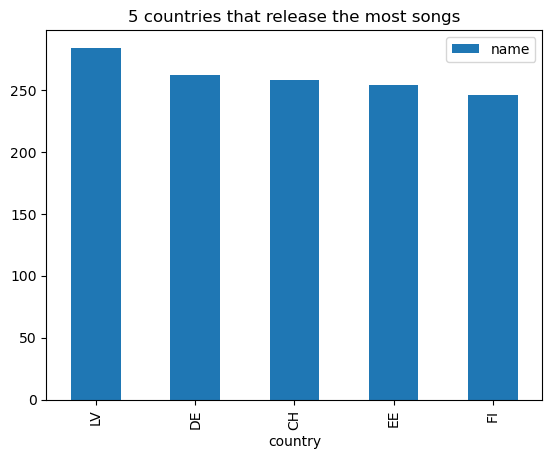

In [10]:
# bar chart
df[["country","name"]].groupby("country").agg({'name' : pd.Series.nunique}).sort_values(by=["name"], ascending=False).head().plot(kind='bar')
plt.title('5 countries that release the most songs')

The 5 countries that release the most songs on Spotify are
1. LV: Latvia
2. DE: Germany (Germany)
3. CH: Switzerland (Switzerland)
4. EE: Estonia
5. FI: Finland

Insights:

Latvia is ranked 1st for releasing the most songs on Spotify

### 3. How many songs will be released from 2019 to 2024?

In [15]:
# Create a new column with the name year
df['Year'] = df['album_release_date'].dt.strftime('%Y')

In [16]:
# Displays the year and number of titles in each country
df[['Year','name']].groupby("Year").agg({'name' : pd.Series.nunique}).sort_values(["Year"], ascending=False).head(6)

,name
Year,
2024,121
2023,3682
2022,459
2021,186
2020,135
2019,97


Text(0.5, 1.0, 'Release the song in 2019-2024')

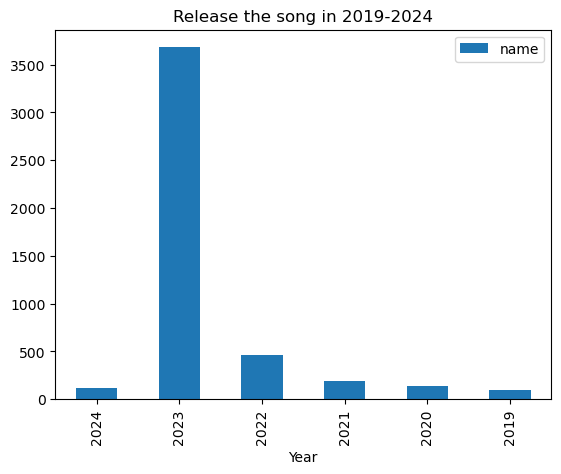

In [17]:
# bar chart
df[['Year','name']].groupby("Year").agg({'name' : pd.Series.nunique}).sort_values(["Year"], ascending=False).head(6).plot(kind='bar')
plt.title('Release the song in 2019-2024')

Insights:
From throughout 2019 to 2024
1. 2023 is the year with the most songs released
2. There has been an increase in song releases from 2019 to 2023
3. In 2024 there will be a decrease in song releases due to insufficient data throughout 2024

### 4. How many songs are in major mode and minor key?

In [17]:
# Displays the mode and number of titles in each country
df[['mode','name']].groupby("mode").agg({'name' : pd.Series.nunique}).sort_values(["name"], ascending=False)

,name
mode,
1,2885
0,2653


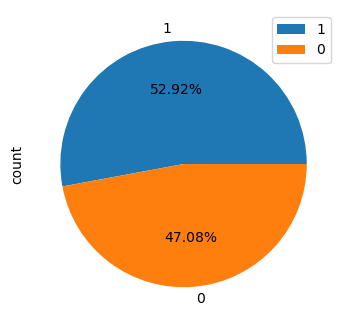

In [41]:
# pie chart
fig,ax1 = plt.subplots(figsize=(4,4))

df['mode'].value_counts().plot(kind='pie', autopct='%.2f%%',ax=ax1)
plt.legend()
plt.show()

Insights:
1. The number of songs in major keys is 2885 (52.92%) and minor keys 2658 (47.08%)
2. There are more songs in major keys than minor keys

### 5. How is the distribution of popularity levels on Spotify?

In [18]:
# Calculate mean, median, mode
mean_popularitas = df.popularity.mean()
median_popularitas = df.popularity.quantile(0.5)
modus_popularitas = df.popularity.mode()[0]

# Calculates skewness, standard deviation and kurtosis
skewness_popularitas = df.popularity.skew()
std_popularitas = df.popularity.std()
kurtosis_popularitas = df.popularity.kurt()

print(f'The mean with outliers is   : {mean_popularitas:.2f}')
print(f'The median with outliers is : {median_popularitas:.2f}')
print(f'The mode with outliers is   : {modus_popularitas:.2f}')
print()
print(f'Skewness with outliers is           : {skewness_popularitas:.2f}')
print(f'Standard Deviation with outliers is : {std_popularitas:.2f}')
print(f'Kurtosis with outliers is           : {kurtosis_popularitas:.2f}')

The mean with outliers is   : 77.33
The median with outliers is : 82.00
The mode with outliers is   : 87.00

Skewness with outliers is           : -1.23
Standard Deviation with outliers is : 15.90
Kurtosis with outliers is           : 2.62


<Axes: >

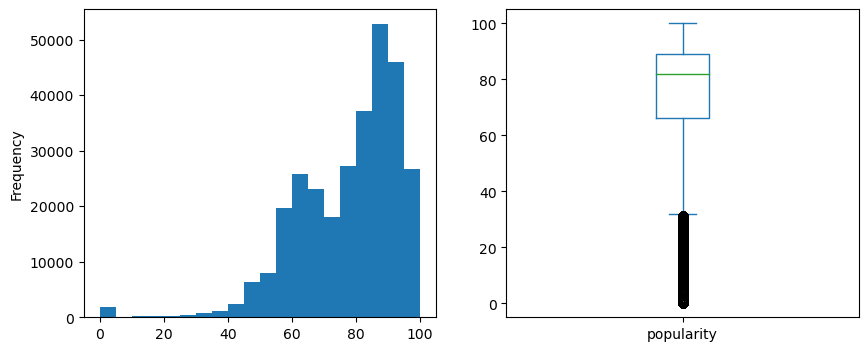

In [20]:
#  histogram and box diagrams 
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

df['popularity'].plot(kind='hist',bins=20,ax=ax[0])
df['popularity'].plot(kind='box',ax=ax[1])

Insights:

1. Judging from the median which is greater than the mean and the mode which is greater than the median it can be said that the distribution is skewed to the left. This is proven by the negative skewness value, namely -1.23.
2. Judging from the high standard deviation, namely 15.90, it can be said that the data is quite spread out and varied
3. Judging from the kurtosis value, it can be said that positive kurtosis shows a conical or sharp distribution (leptokurtic) compared to a normal distribution.

### 6. Check whether there is a relationship between music popularity and danceability, energy and tempo?

**popularity with danceability**  
H0: There is no relationship between popularity and danceability in music  
H1: There is a relationship between popularity and danceability in music  

**population with energy**  
H0: There is no relationship between popularity and energy in music  
H1: There is a relationship between popularity and energy in music  

**population with tempo**  
H0: There is no relationship between popularity and tempo in music  
H1: There is a relationship between popularity and tempo in music  

In [19]:
# The reason for using Kendal Tau is because both data are of ordinal type and Kendall Tau is also resistant to outlier values
cols = df.drop(columns=['spotify_id','name','artists','acousticness','mode','instrumentalness','loudness','daily_rank','daily_movement','weekly_movement','country','snapshot_date', 'popularity', 'is_explicit', 'duration_ms', 'album_name', 'album_release_date','time_signature','Year', 'key', 'speechiness', 'liveness', 'valence']).columns

for col in cols:
    corr_tau, pval_k = stats.kendalltau(df['popularity'], df[col])
    prompt = " (ada hubungan)" if pval_k <0.05 else ""
    print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k} pada kolom {col} {prompt}")

tau-correlation: -0.02, p-value: 3.467095879755165e-70 pada kolom danceability  (ada hubungan)
tau-correlation: 0.01, p-value: 1.9105917770636848e-09 pada kolom energy  (ada hubungan)
tau-correlation: 0.01, p-value: 1.448979006622324e-21 pada kolom tempo  (ada hubungan)


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


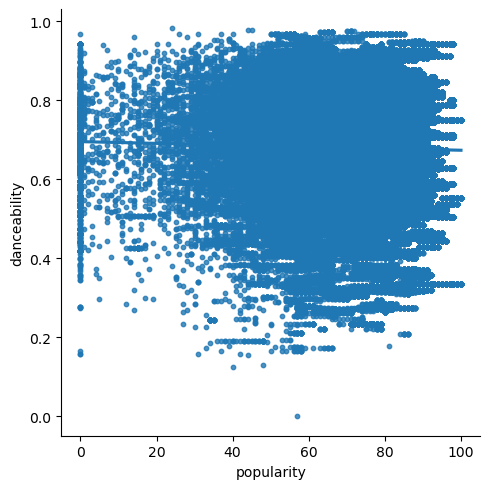

In [49]:
# Create a population scatter diagram with danceability
sns.lmplot(data=df,x='popularity', y='danceability', scatter_kws={"s":10})

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


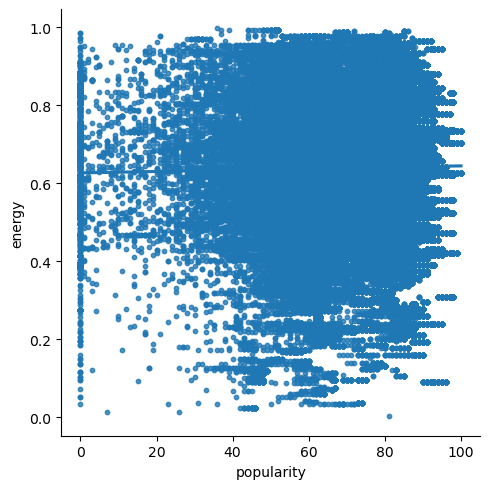

In [50]:
# Create a population scatter diagram with energy
sns.lmplot(data=df,x='popularity', y='energy', scatter_kws={"s":10})

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


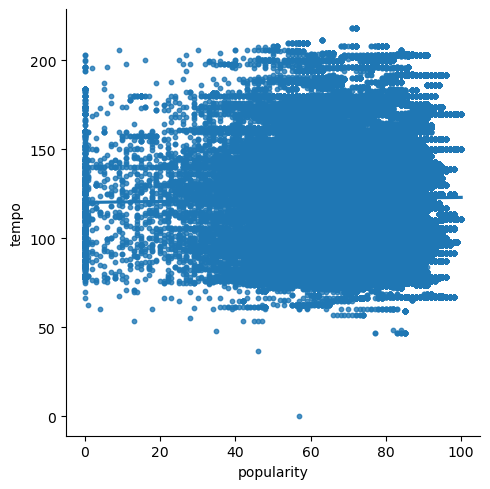

In [52]:
# Create a population scatter diagram with tempo
sns.lmplot(data=df,x='popularity', y='tempo', scatter_kws={"s":10})

<Axes: >

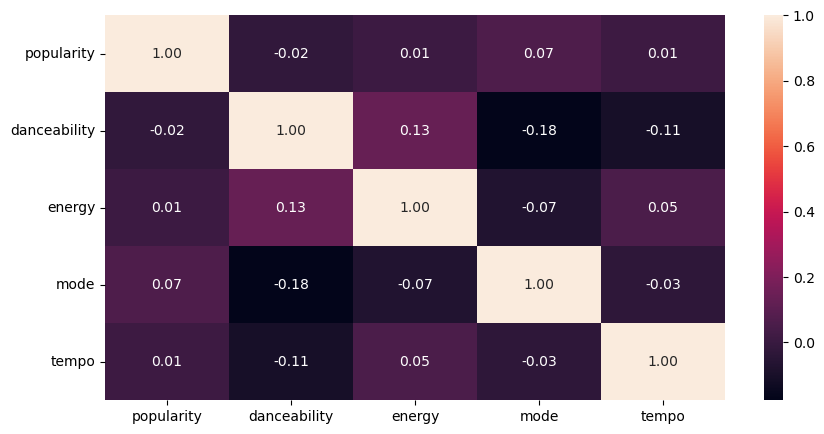

In [5]:
# Heatmap
fig,ax = plt.subplots(figsize=(10,5))
sns.heatmap(df[['popularity','danceability', 'energy', 'mode', 'tempo']].corr(method='kendall'), annot=True , fmt = '.2f', ax=ax)

Insights:

Judging from each P-value which is less than 0.05, it can be said that there is a significant correlation or relationship between popularity and danceability, popularity with energy and popularity with tempo.

### 7. Is the level of popularity of music in major key mode different from minor key mode?

H0: the level of popularity of music in major key mode is the same as in minor key  
H1: The level of popularity of music in major key mode is different from minor key mode  

In [20]:
# Calculate the average popularity of major key mode and minor key mode
print('Average popularity of major key modes : ',df[df['mode']==1]['popularity'].mean())
print('Average popularity of minor key modes : ',df[df['mode']==0]['popularity'].mean())

Average popularity of major key modes :  78.3617315249081
Average popularity of minor key modes :  76.17527925001424


In [24]:
# Two-Sample Dependent Test 
t_stat, p_val = stats.ttest_ind(df[df['mode']==1]['popularity'],df[df['mode']==0]['popularity'])
print('T-Statistic:',t_stat)
print('P-value:',p_val) 

T-Statistic: 37.556237920718736
P-value: 5.89205525403742e-308


Insights:

Judging from the P-value which is less than 0.05, it can be said that H0 is rejected. There is not enough evidence to support the popularity between major and minor keys

# **E. Conclusion**

**Insight:**  
The conclusion that can be drawn from the universal_top_spotify_songs dataset is that the artist who performed the most popular song is Mariah Carey with the song All I Want for Christmas Is You with a popularity level of 100. In 2019-2023 there was an increase in people releasing songs. And the keys that are widely used are major 52.92% and minor 47.08%. In this dataset there are also the top 5 countries that release songs, namely: Latvia, Germany, Switzerland, Estonia and Finland.

Judging from the distribution of popularity, it is very varied with a distribution that skews to the left and is sharply conical (leptokurtic). There is a relationship between energy and the level of music popularity. And there is also a difference between popularity in major keys and minor keys, where the average value of popularity of music in major keys is greater than in minor keys.


**Business Insights:**  
To increase the popularity of the music that Luthfi makes, from the music factor, label companies can help Luthfi by making music that is suitable for dancing, music with an intensity and level of song activity > 0.4 and also using a music tempo in beats > 100. Apart from that, Label companies can promote songs that have been created effectively. So in the next 2 months the music that Luthfi makes will be popular on Spotify.